In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Sparkling.csv')

In [4]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
date_rng = pd.date_range(start='1/1/1980', periods = len(df), freq='M')
date_rng

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df['Time_Stamp'] = date_rng
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [7]:
df.set_index('Time_Stamp',inplace=True)
df=df[['Sparkling']]
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [11]:
from pylab import rcParams
rcParams['figure.figsize']=20,8

Text(0, 0.5, 'Sparkle Wine Sales')

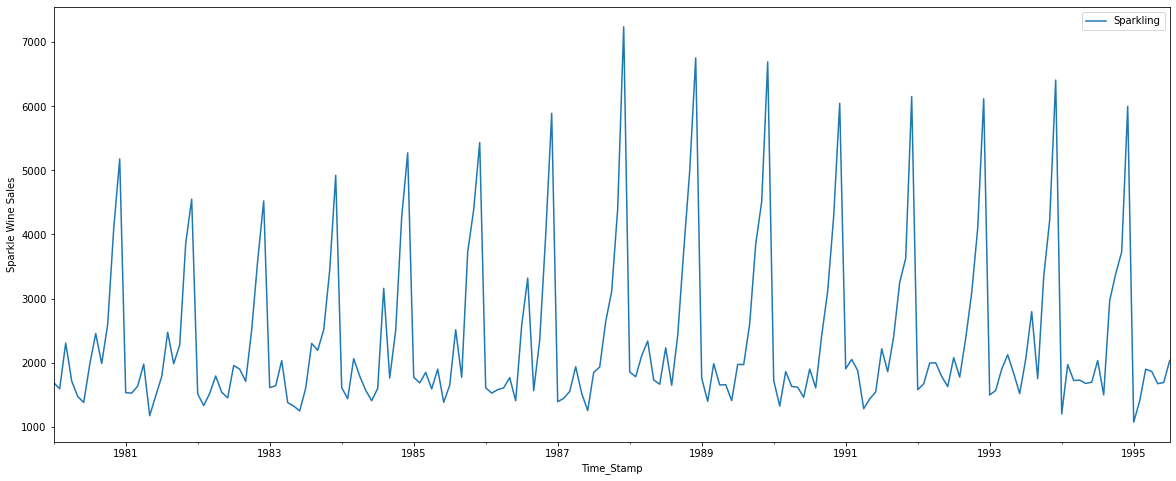

In [12]:
df.plot()
plt.ylabel('Sparkle Wine Sales')

## 2. Exploratory Analysis and Decomposition

In [13]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [14]:
df.shape

(187, 1)

#### Plot the Data to check the Trend and Seasonality

Text(0, 0.5, 'Wine Sales')

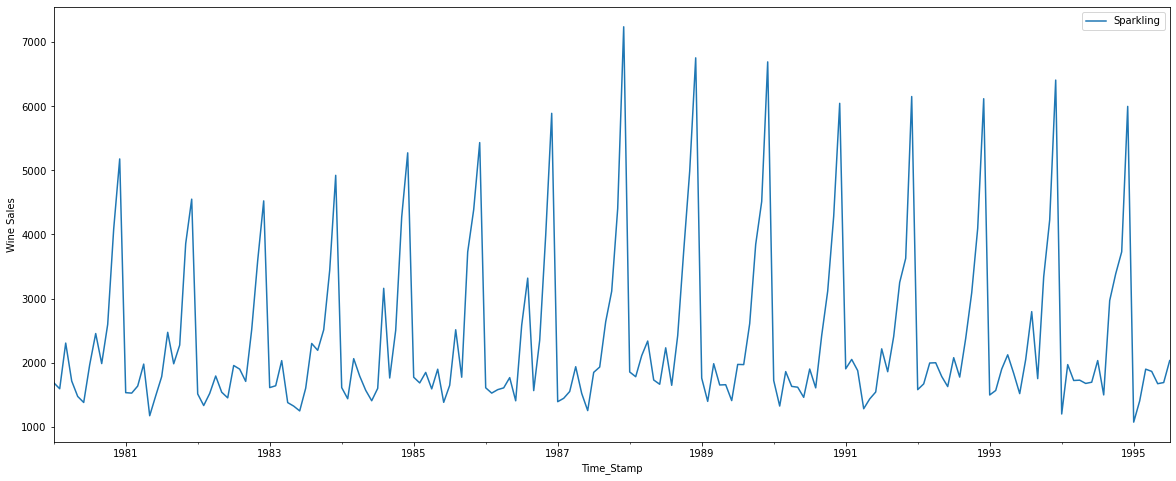

In [15]:
df.plot()
plt.ylabel('Wine Sales')

#### Monthly Boxplot

<AxesSubplot:xlabel='Time_Stamp', ylabel='Sparkling'>

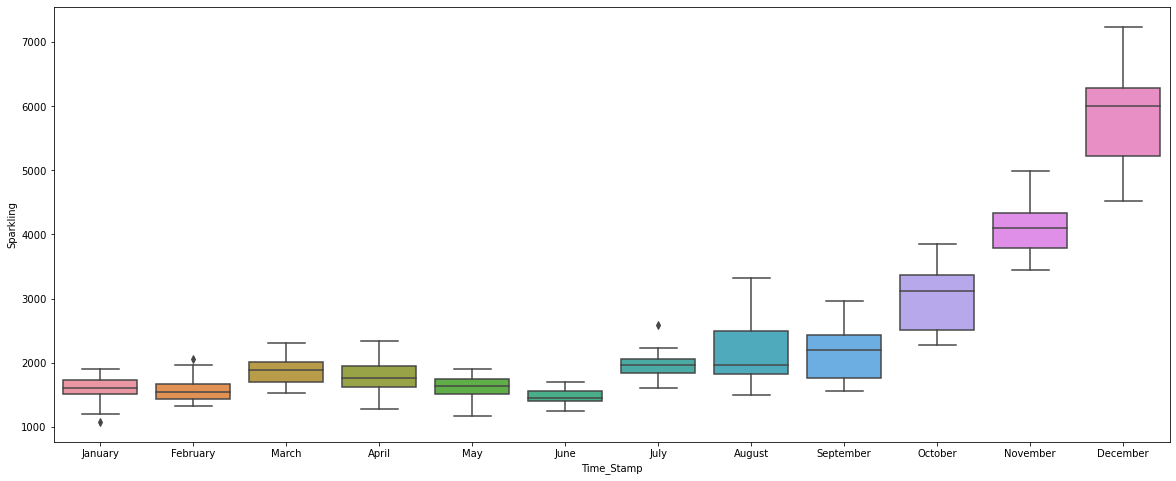

In [16]:
sns.boxplot(df.index.month_name(),df['Sparkling'])

#### Yearly BoxPlot

<AxesSubplot:xlabel='Time_Stamp', ylabel='Sparkling'>

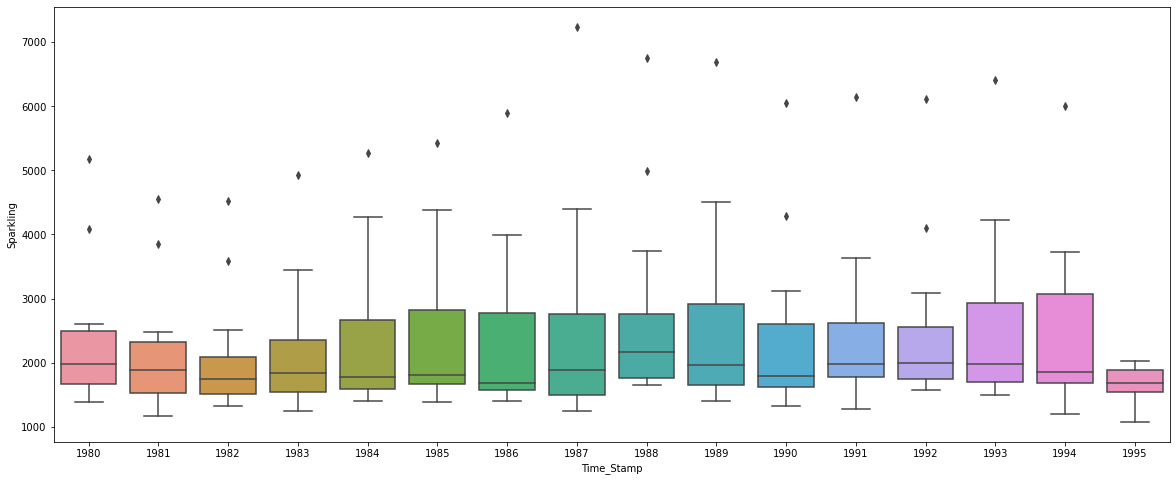

In [18]:
sns.boxplot(df.index.year,df['Sparkling'])

#### Check the Null Values

In [19]:
df.isnull().sum()

Sparkling    0
dtype: int64

#### Decompose time series

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

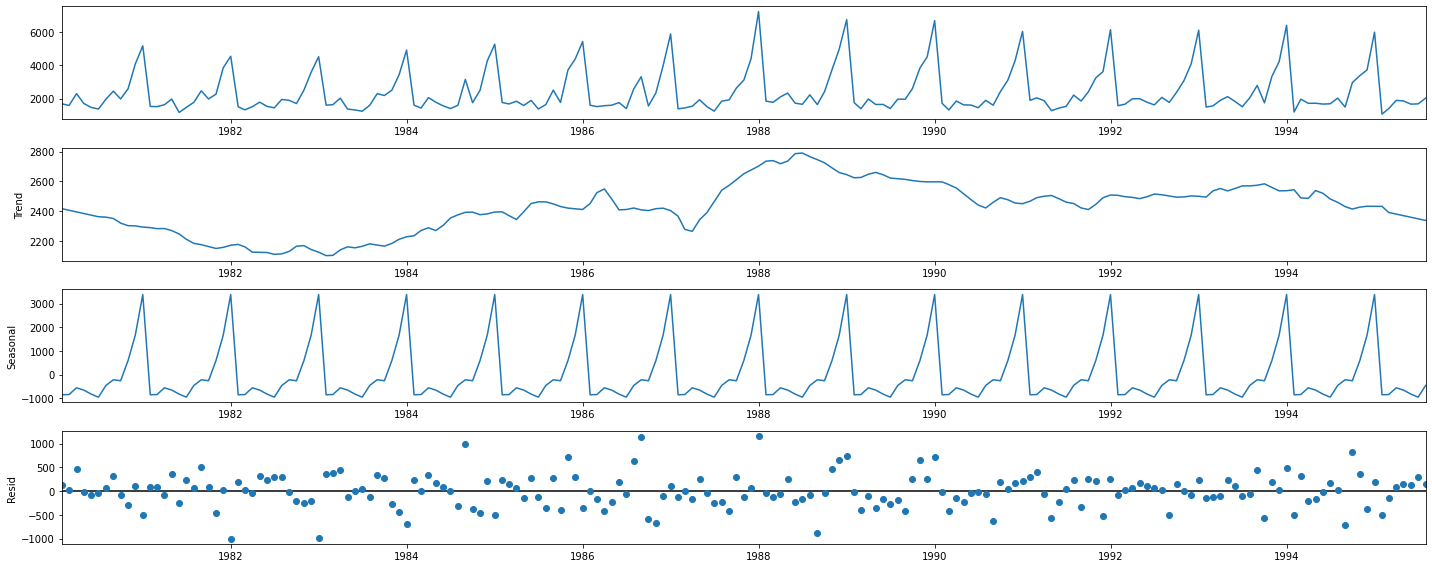

In [21]:
decompose=seasonal_decompose(df,model='additive',extrapolate_trend='freq')
decompose.plot();

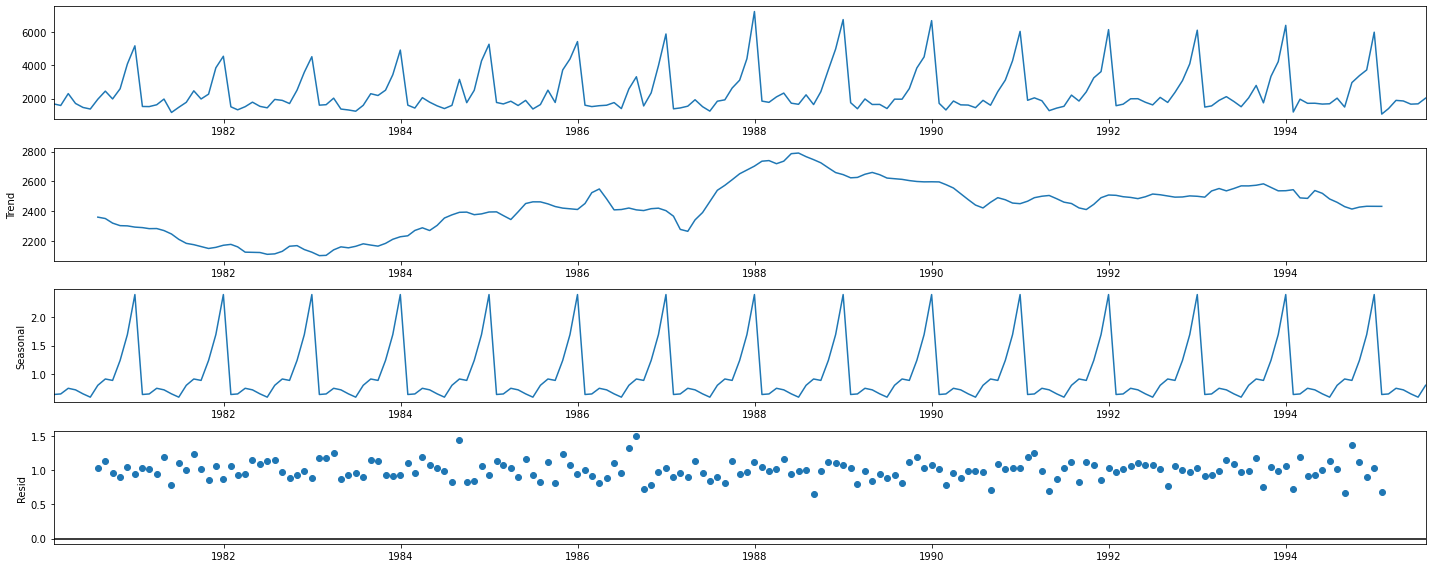

In [22]:
## Multiplicative Decomposition
decomposition_mul = seasonal_decompose(df,model='multiplicative')
decomposition_mul.plot();

## 3. Splitting the Data in Train and Test Data

In [17]:
df_train=df[df.index.year < 1991]
df_test=df[df.index.year >= 1991]

In [18]:
df_train.shape

(132, 1)

In [19]:
df_test.shape

(55, 1)

In [20]:
df_train.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [21]:
df_train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [22]:
df_test.head()

,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [23]:
df_test.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


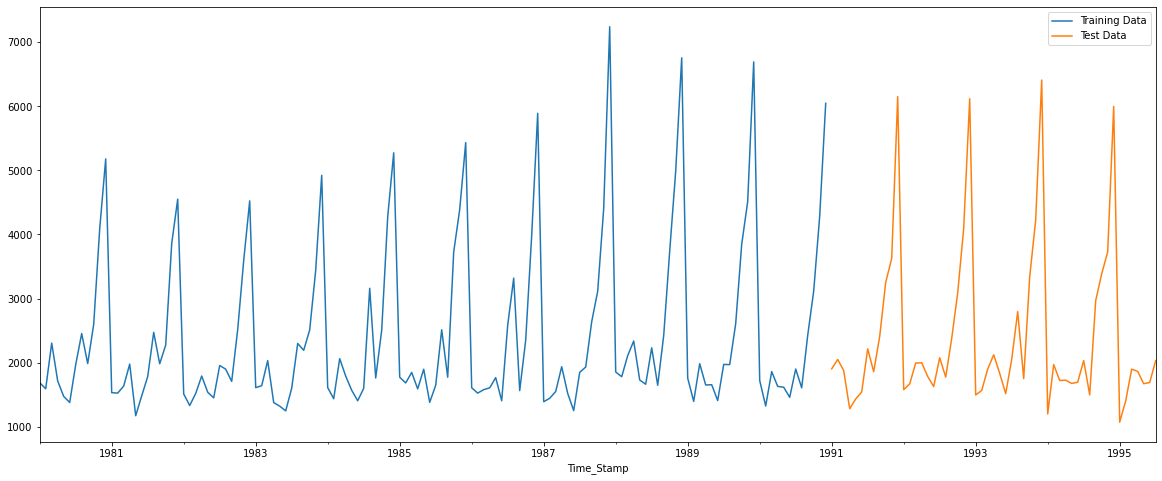

In [24]:
df_train['Sparkling'].plot()
df_test['Sparkling'].plot()
plt.legend(['Training Data', 'Test Data'])
plt.show()

## 4. Smoothning Models

### A. Simple Exponential Smoothning

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt 

In [26]:
SES_train = df_train.copy()
SES_test = df_test.copy()

In [27]:
# Applying Simple Exponential Smoothning algorithm on the Training data
model_ses=SimpleExpSmoothing(SES_train['Sparkling'])
# Fitting the  model and asking python to choose the optimal parameters
model_ses_fit=model_ses.fit(optimized=True)

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [28]:
model_ses_fit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
print('Alpha value is:', model_ses.params['smoothing_level'])

Alpha value is: 0.049607360581862936


In [30]:
# Adding the fitted values (predictions on the training set)
SES_train['predict'] = model_ses_fit.fittedvalues
print(SES_train.head(),'\n')

            Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1818.535750
1980-02-29       1591  1811.961001
1980-03-31       2304  1800.999709
1980-04-30       1712  1825.952226
1980-05-31       1471  1820.299357 



In [31]:
# Using fitted training model to forecast on the test dataset
SES_test['predict'] = model_ses_fit.forecast(steps=len(SES_test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


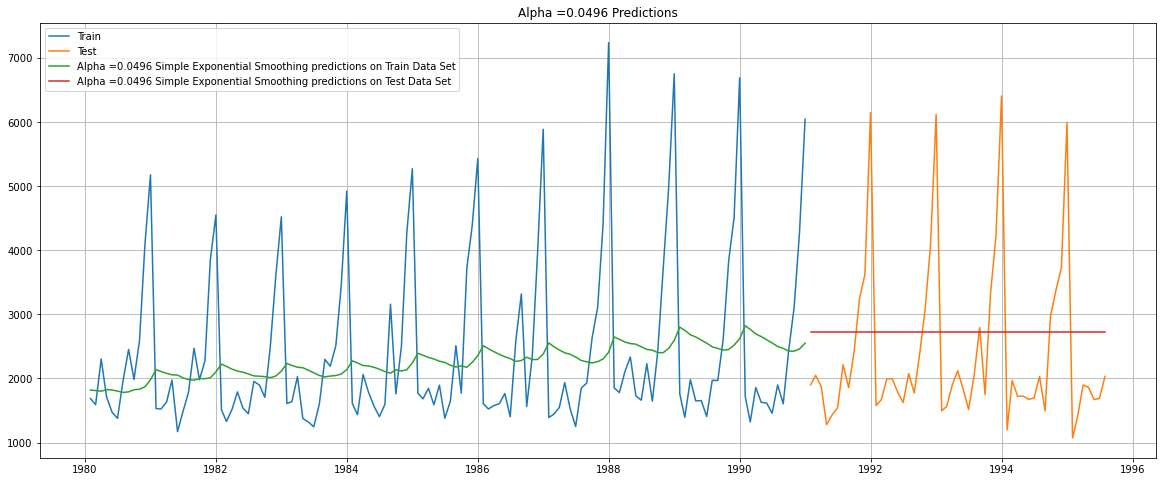

In [32]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Train Data Set')
plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Data Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

Here, we see that this Simple Exponential Smoothing (in which the parameters are automatically estimated by Python) is working like a Simple avg model. This is happening because the value  𝛼  is close to 0.
Lesser the value of  𝛼 , more weight is given to older value.

In [33]:
## Mean Absolute Percentage Error (MAPE) - Function Definition
from   sklearn.metrics                 import  mean_squared_error
import statsmodels.tools.eval_measures as      em

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [34]:
print('TRAIN SES MAPE:',MAPE(SES_train['Sparkling'],SES_train['predict']))
print('TRAIN SES RMSE:',np.sqrt(mean_squared_error(SES_train['Sparkling'],SES_train['predict'])))
#different way to calculate RMSE
print('TRAIN SES RMSE (calculated using statsmodels):',em.rmse(SES_train['Sparkling'],SES_train['predict'].values))

print('\nTEST SES MAPE:',MAPE(SES_test['Sparkling'],SES_test['predict']))
print('TEST SES RMSE:',np.sqrt(mean_squared_error(SES_test['Sparkling'],SES_test['predict'])))
#different way to calculate RMSE
print('TEST SES RMSE (calculated using statsmodels):',em.rmse(SES_test['Sparkling'],SES_test['predict']))

TRAIN SES MAPE: 38.64000950498397
TRAIN SES RMSE: 1315.2320768712439
TRAIN SES RMSE (calculated using statsmodels): 1315.2320768712439

TEST SES MAPE: 50.94034456927914
TEST SES RMSE: 1316.0354872762928
TEST SES RMSE (calculated using statsmodels): 1316.0354872762928


In [35]:
result_ses = pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(SES_train['Sparkling'],SES_train['predict']))],
                          'Train MAPE':[MAPE(SES_train['Sparkling'],SES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(SES_test['Sparkling'],SES_test['predict']))],
                          'Test MAPE': [MAPE(SES_test['Sparkling'],SES_test['predict'])]},index=['Alpha=0.0496,SES'])
result_ses

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.0496,SES",1315.232077,38.64001,1316.035487,50.940345


### B. Double Exponential Smoothing Holt

In [36]:
DES_train = df_train.copy()
DES_test = df_test.copy()

In [37]:
model_DES=Holt(DES_train['Sparkling'])
model_DES_fit=model_DES.fit(optimized=True)

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
model_DES.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [39]:
print('Alpha value is:', model_DES.params['smoothing_level'])
print('Beta value is:', model_DES.params['smoothing_trend'])

Alpha value is: 0.6885714285714285
Beta value is: 9.999999999999999e-05


In [40]:
# Adding the fitted values (predictions on the training set)
DES_train['predict'] = model_DES_fit.fittedvalues
print(DES_train.head(),'\n')

            Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1591.000000
1980-02-29       1591  1561.420827
1980-03-31       2304  1486.796779
1980-04-30       1712  1954.564417
1980-05-31       1471  1692.589636 



In [41]:
# Using the fitted model on the training set to forecast on the test set
DES_test['predict'] = model_DES_fit.forecast(steps=len(DES_test))
DES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,5221.278699
1991-02-28,2049,5127.886554
1991-03-31,1874,5034.494409
1991-04-30,1279,4941.102264
1991-05-31,1432,4847.710119


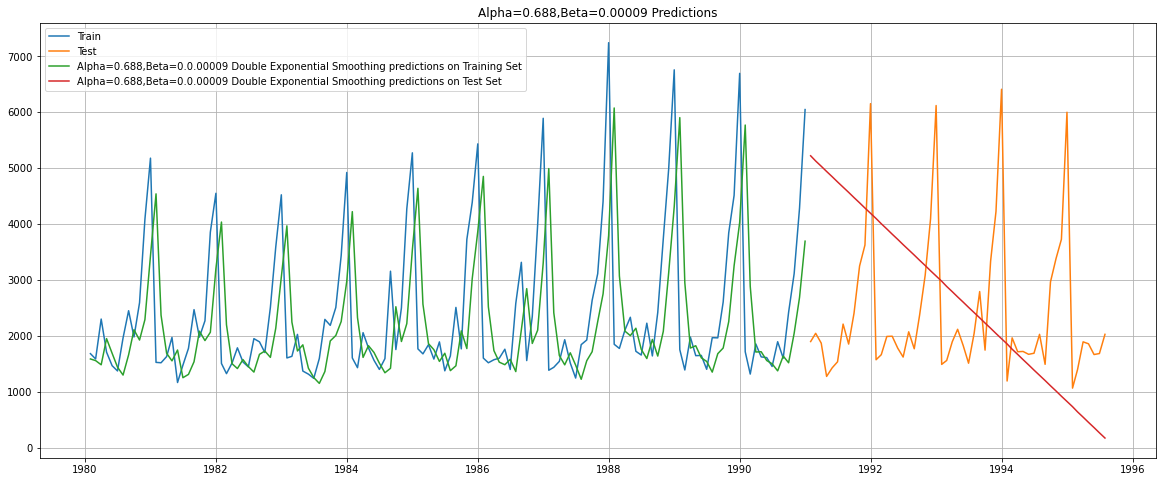

In [42]:
## Plotting on both the Training and Test data

plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.688,Beta=0.0.00009 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.688,Beta=0.0.00009 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.688,Beta=0.00009 Predictions');

In [43]:
print('TRAIN DES MAPE:',MAPE(DES_train['Sparkling'],DES_train['predict']))
print('TRAIN DES RMSE:',np.sqrt(mean_squared_error(DES_train['Sparkling'],DES_train['predict'])))

print('\nTEST DES MAPE:',MAPE(DES_test['Sparkling'],DES_test['predict']))
print('TEST DES RMSE:',np.sqrt(mean_squared_error(DES_test['Sparkling'],DES_test['predict'])))

TRAIN DES MAPE: 40.595528426701435
TRAIN DES RMSE: 1349.6504599141276

TEST DES MAPE: 76.08619818419555
TEST DES RMSE: 2007.238525758568


In [44]:
result_des=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(DES_train['Sparkling'],DES_train['predict']))],
                          'Train MAPE':[MAPE(DES_train['Sparkling'],DES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(DES_test['Sparkling'],DES_test['predict']))],
                          'Test MAPE': [MAPE(DES_test['Sparkling'],DES_test['predict'])]},index=['Alpha=0.688,Beta=0.00009,DES'])
result_des

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.688,Beta=0.00009,DES",1349.65046,40.595528,2007.238526,76.086198


### C. Holt Winter Smoothing

In [46]:
TES_train = df_train.copy()
TES_test = df_test.copy()

In [47]:
model_TES=ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_fit=model_TES.fit(optimized=True)

In [48]:
model_TES_fit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
print('Alpha value is:', model_TES.params['smoothing_level'])
print('Beta value is:', model_TES.params['smoothing_trend'])
print('Gamma value is:',model_TES.params['smoothing_seasonal'])

Alpha value is: 0.111108139467838
Beta value is: 0.06172875597197263
Gamma value is: 0.3950479631147446


In [50]:
# Adding the fitted values (predictions on the training set)
TES_train['predict'] = model_TES_fit.fittedvalues
print(TES_train.head(),'\n')

            Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1731.915187
1980-02-29       1591  1648.271331
1980-03-31       2304  2238.471955
1980-04-30       1712  1903.256752
1980-05-31       1471  1515.132699 



In [51]:
# Using the fitted model on the training set to forecast on the test set
TES_test['predict'] = model_TES_fit.forecast(steps=len(TES_test))
TES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,1577.224489
1991-02-28,2049,1333.677558
1991-03-31,1874,1745.945679
1991-04-30,1279,1630.411925
1991-05-31,1432,1523.289070


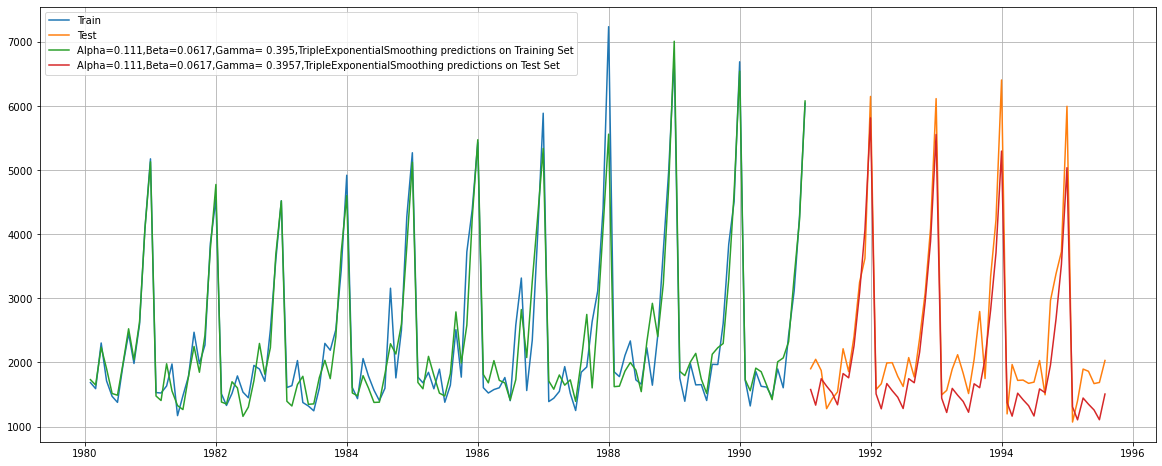

In [55]:
## Plotting on both the Training and Test using autofit

plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict'], label='Alpha=0.111,Beta=0.0617,Gamma= 0.395,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict'], label='Alpha=0.111,Beta=0.0617,Gamma= 0.3957,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [56]:
print('TRAIN TES MAPE:',MAPE(TES_train['Sparkling'],TES_train['predict']))
print('TRAIN TES RMSE:',np.sqrt(mean_squared_error(TES_train['Sparkling'],TES_train['predict'])))

print('\nTEST TES MAPE:',MAPE(TES_test['Sparkling'],TES_test['predict']))
print('TEST TES RMSE:',np.sqrt(mean_squared_error(TES_test['Sparkling'],TES_test['predict'])))

TRAIN TES MAPE: 11.318271931948894
TRAIN TES RMSE: 356.97492930037777

TEST TES MAPE: 17.58025532173681
TEST TES RMSE: 469.7679703988473


In [57]:
result_tes=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(TES_train['Sparkling'],TES_train['predict']))],
                          'Train MAPE':[MAPE(TES_train['Sparkling'],TES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(TES_test['Sparkling'],TES_test['predict']))],
                          'Test MAPE': [MAPE(TES_test['Sparkling'],TES_test['predict'])]},index=['Alpha=0.111,Beta=0.0617,Gamma= 0.395,TES'])
result_tes

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.111,Beta=0.0617,Gamma= 0.395,TES",356.974929,11.318272,469.76797,17.580255


### D. Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
train_time = [i+1 for i in range(len(df_train))]
test_time = [i+133 for i in range(len(df_test))]
print('Training Time instance','\n',train_time,'\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [60]:
df_train.shape

(132, 1)

In [61]:
df_test.shape

(55, 1)

In [62]:
lr_train=df_train.copy()
lr_test=df_test.copy()

In [63]:
lr_train['time']=train_time
lr_test['time']=test_time

In [64]:
lr_train.head()

,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


In [65]:
lr_test.head()

,Sparkling,time
Time_Stamp,,
1991-01-31,1902,133
1991-02-28,2049,134
1991-03-31,1874,135
1991-04-30,1279,136
1991-05-31,1432,137


In [66]:
model_lr=LinearRegression()
model_lr_fit=model_lr.fit(lr_train[['time']].values,lr_train['Sparkling'].values)

In [67]:
lr_predict_train = model_lr_fit.predict(lr_train[['time']])
lr_predict_test = model_lr_fit.predict(lr_test[['time']])

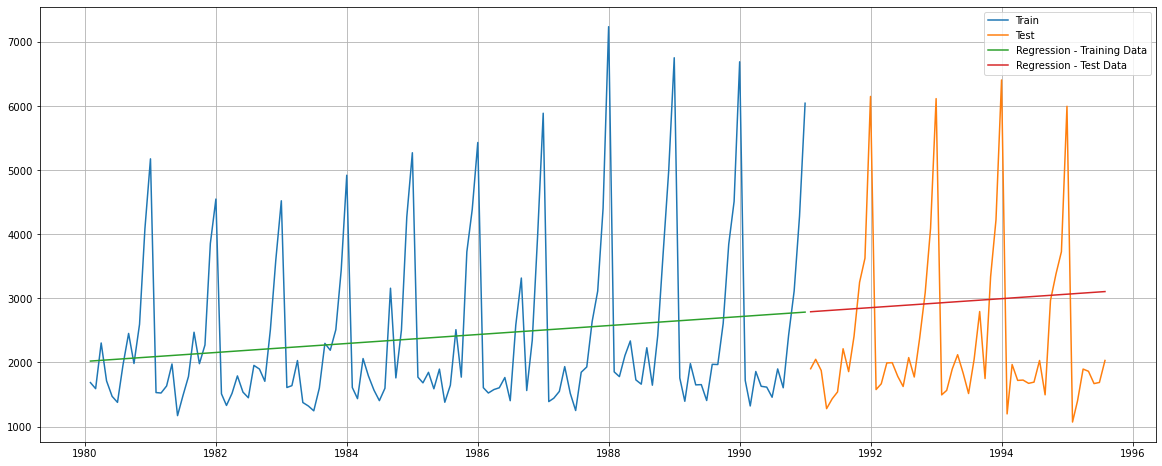

In [68]:
# Adding the training predictions to above Linear Regression Training data
lr_train['predict'] = lr_predict_train
# Adding the predictions on the test set to  above Linear Regression Test data
lr_test['predict'] = lr_predict_test

# Plotting the actual training data
plt.plot(df_train['Sparkling'], label='Train')
# Plotting the actual test data
plt.plot(df_test['Sparkling'], label='Test')

# Plotting the predicted training data
plt.plot(lr_train['predict'], label='Regression - Training Data')
# Plotting the predicted test data
plt.plot(lr_test['predict'], label='Regression - Test Data')

# Setting the location of the legend
plt.legend(loc='best')
plt.grid();

In [69]:
print('TRAIN LR MAPE:',MAPE(lr_train['Sparkling'].values,lr_predict_train))
print('TRAIN LR RMSE:',np.sqrt(mean_squared_error(lr_train['Sparkling'].values,lr_predict_train)))

print('\nTEST LR MAPE:',MAPE(lr_test['Sparkling'].values,lr_predict_test))
print('TEST LR RMSE:',np.sqrt(mean_squared_error(lr_test['Sparkling'].values,lr_predict_test)))

TRAIN LR MAPE: 40.703901522912446
TRAIN LR RMSE: 1279.32234587938

TEST LR MAPE: 59.34557219090104
TEST LR RMSE: 1389.135174897992


In [70]:
result_lr=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(lr_train['Sparkling'],lr_predict_train))],
                          'Train MAPE':[MAPE(lr_train['Sparkling'],lr_predict_train)],
                          'Test RMSE': [np.sqrt(mean_squared_error(lr_test['Sparkling'].values,lr_predict_test))],
                          'Test MAPE': [MAPE(lr_test['Sparkling'].values,lr_predict_test)]},index=['Linear Regression'])


result_lr

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
Linear Regression,1279.322346,40.703902,1389.135175,59.345572


### D. Naive Bayes

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [71]:
nb_train=df_train.copy()
nb_test=df_test.copy()

In [72]:
nb_train['Sparkling'].values[-1]

6047

In [73]:
nb_test['predict']=nb_train['Sparkling'].values[-1]
nb_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,6047
1991-02-28,2049,6047
1991-03-31,1874,6047
1991-04-30,1279,6047
1991-05-31,1432,6047


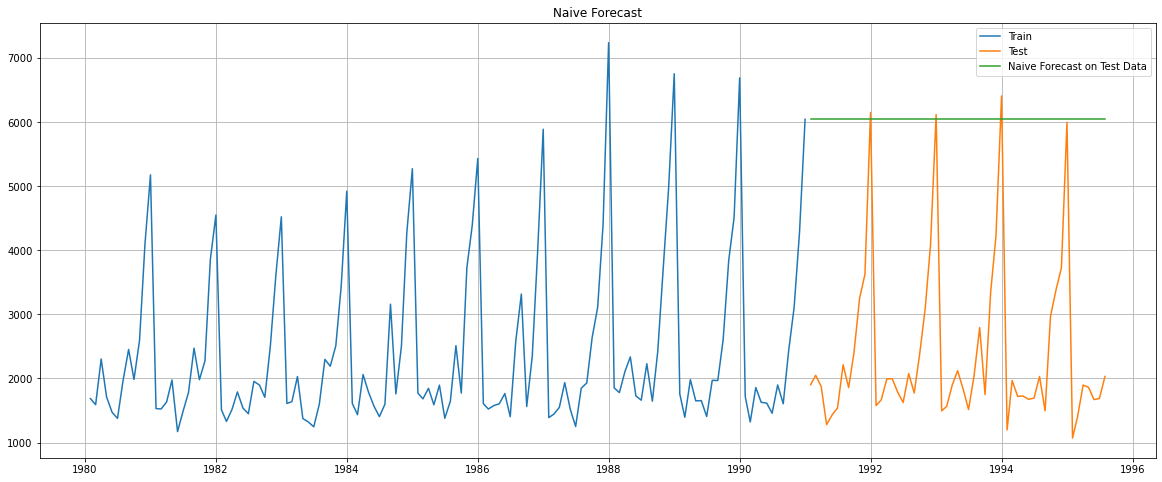

In [74]:
## Plotting the actual training data
plt.plot(nb_train['Sparkling'], label='Train')
## Plotting the acutal test data
plt.plot(df_test['Sparkling'], label='Test')

## Plottig the predicted test data
plt.plot(nb_test['predict'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [75]:
print('\nTEST NB MAPE:',MAPE(nb_test['Sparkling'],nb_test['predict']))
print('TEST NB RMSE:',np.sqrt(mean_squared_error(nb_test['Sparkling'].values,nb_test['predict'])))


TEST NB MAPE: 201.32764950352743
TEST NB RMSE: 3864.2793518443914


In [76]:
result_nb=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(nb_test['Sparkling'].values,nb_test['predict']))],
                        'Test MAPE': MAPE(nb_test['Sparkling'].values,nb_test['predict'])},index=['Naive'])


result_nb

,Test RMSE,Test MAPE
Naive,3864.279352,201.32765


### E. Simple Average Method

In [77]:
sa_train=df_train.copy()
sa_test=df_test.copy()

In [78]:
sa_test['mean_forecast'] = sa_train['Sparkling'].mean()
sa_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


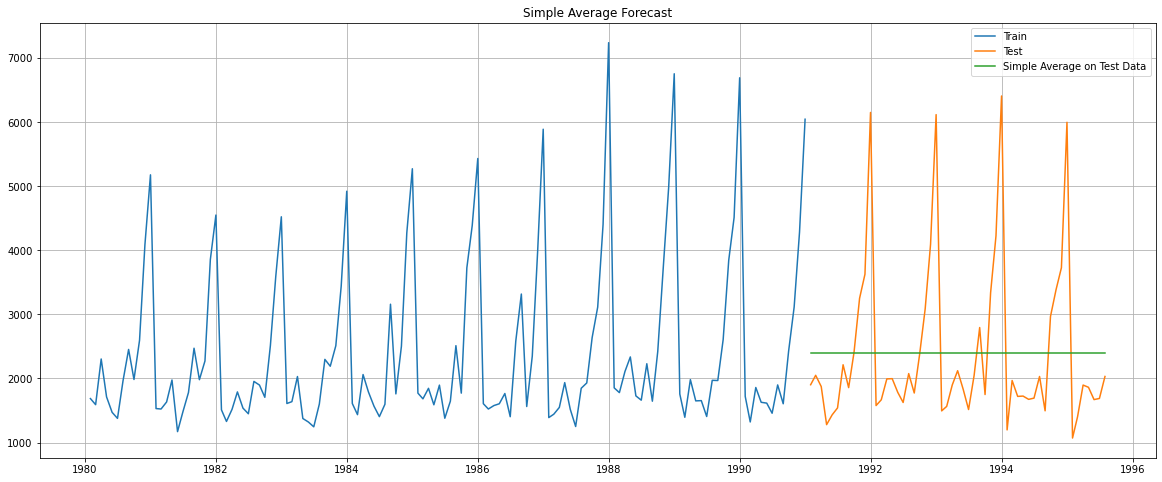

In [79]:
plt.plot(sa_train['Sparkling'], label='Train')
plt.plot(sa_test['Sparkling'], label='Test')
plt.plot(sa_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [80]:
print('\nTEST SA MAPE:',MAPE(sa_test['Sparkling'],sa_test['mean_forecast']))
print('TEST SA RMSE:',np.sqrt(mean_squared_error(sa_test['Sparkling'],sa_test['mean_forecast'])))


TEST SA MAPE: 39.15733568503726
TEST SA RMSE: 1275.0818036965309


In [81]:
result_sa=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(sa_test['Sparkling'],sa_test['mean_forecast']))],
                        'Test MAPE': MAPE(sa_test['Sparkling'],sa_test['mean_forecast'])},index=['Simple Avg'])


result_sa

,Test RMSE,Test MAPE
Simple Avg,1275.081804,39.157336


### F. Moving Average Method

In [82]:
MA=df.copy()
MA.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [83]:
# rolling Moving Averages

# 2 period Moving Average Computation
MA['Trailing_2'] = MA['Sparkling'].rolling(2).mean()

# 4 period Moving Average Computation
MA['Trailing_4'] = MA['Sparkling'].rolling(4).mean()

# 6 period Moving Average Computation
MA['Trailing_6'] = MA['Sparkling'].rolling(6).mean()

# 9 period Moving Average Computation
MA['Trailing_9'] = MA['Sparkling'].rolling(9).mean()

MA.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


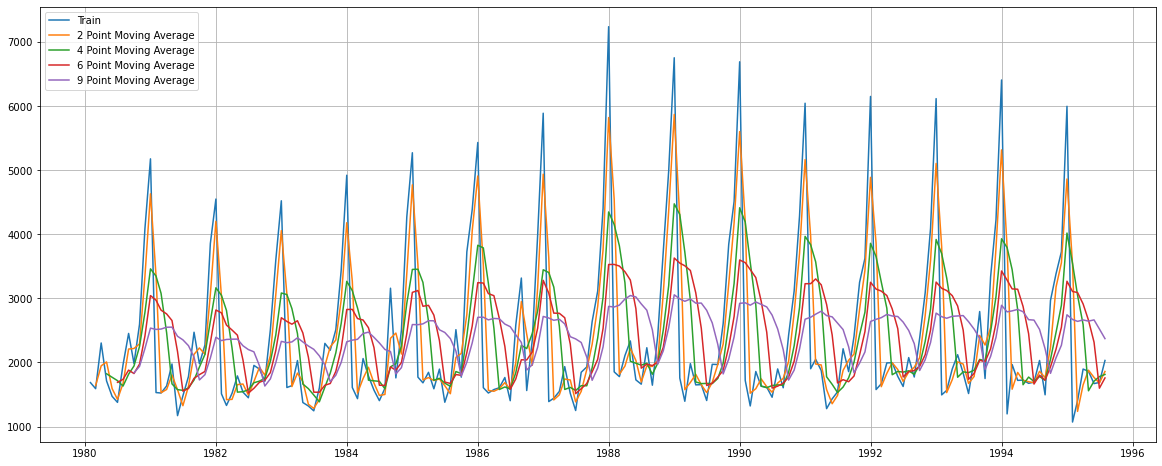

In [84]:
## Plotting on the whole data and comparing moving avg outputs

plt.plot(MA['Sparkling'],label='Train')
plt.plot(MA['Trailing_2'],label='2 Point Moving Average')
plt.plot(MA['Trailing_4'],label='4 Point Moving Average')
plt.plot(MA['Trailing_6'],label ='6 Point Moving Average')
plt.plot(MA['Trailing_9'],label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [85]:
#Creating train and test set 
trailing_MA_train=MA[MA.index<'1991'] 
trailing_MA_test=MA[MA.index>'1991']

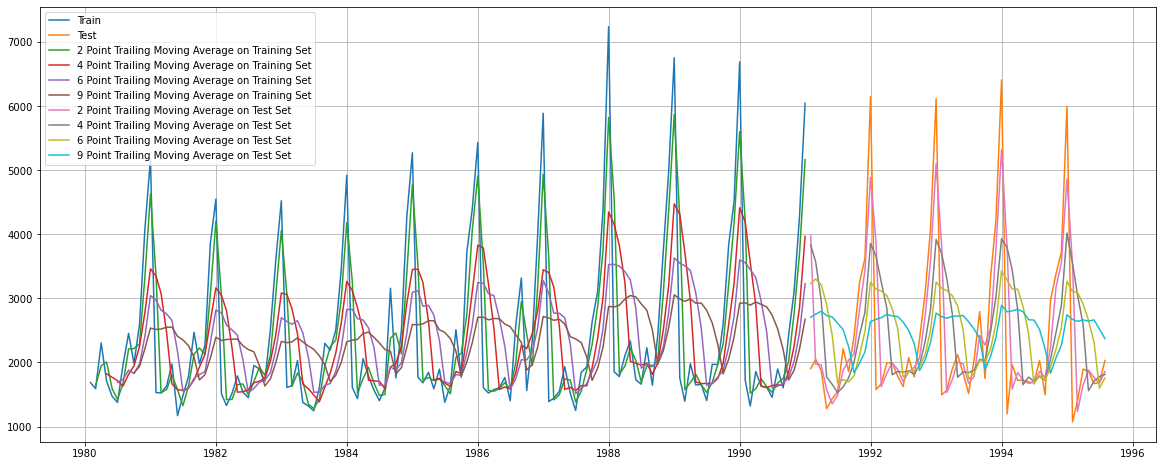

In [86]:
## Plotting on both the Training and Test data


plt.plot(trailing_MA_train['Sparkling'], label='Train')
plt.plot(trailing_MA_test['Sparkling'], label='Test')

plt.plot(trailing_MA_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [87]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA
print('\nTEST MAPE Trailing_2:',MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_2']))
print('TEST RMSE Trailing_2:',np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_2'])))

## Test Data - RMSE and MAPE --> 4 point Trailing MA
print('\nTEST MAPE Trailing_4:',MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_4']))
print('TEST RMSE Trailing_4:',np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_4'])))

## Test Data - RMSE and MAPE --> 6 point Trailing MA
print('\nTEST MAPE Trailing_6:',MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_6']))
print('TEST RMSE Trailing_6:',np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_6'])))

## Test Data - RMSE and MAPE --> 9 point Trailing MA
print('\nTEST MAPE Trailing_9:',MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_9']))
print('TEST RMSE Trailing_9:',np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_9'])))


TEST MAPE Trailing_2: 24.71135383931903
TEST RMSE Trailing_2: 813.4006839972983

TEST MAPE Trailing_4: 41.08365171108755
TEST RMSE Trailing_4: 1156.589694081071

TEST MAPE Trailing_6: 48.40037563823118
TEST RMSE Trailing_6: 1283.9274280129855

TEST MAPE Trailing_9: 50.07157140216773
TEST RMSE Trailing_9: 1346.2783154241804


In [88]:
result_MA=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_2'])),
                                     np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_4'])),
                                     np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_6'])),
                                     np.sqrt(mean_squared_error(df_test['Sparkling'],trailing_MA_test['Trailing_9']))],
                        'Test MAPE': [MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_2']),
                                     MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_4']),
                                     MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_6']),
                                      MAPE(df_test['Sparkling'],trailing_MA_test['Trailing_9'])]},index=['TrailingMovingAvg_2','TrailingMovingAvg_4','TrailingMovingAvg_6','TrailingMovingAvg_9'])


result_MA

,Test RMSE,Test MAPE
TrailingMovingAvg_2,813.400684,24.711354
TrailingMovingAvg_4,1156.589694,41.083652
TrailingMovingAvg_6,1283.927428,48.400376
TrailingMovingAvg_9,1346.278315,50.071571


Looking at the MAPE and RMSE values - its clear that the 2 point trailing moving averages model gives more accurate forecasts amongst all Trailing moving averages models

## 5.Check for the stationarity of the data

In [89]:
from statsmodels.tsa.stattools import adfuller

- The Augmented Dickey-Fuller test is an unit root test which determines the probability that a unit root is present and subsequently whether the series is non-stationary.

- The hypothesis in a simple form for the ADF test is:

- 𝐻0  : The Time Series has a unit root and is thus non-stationary.
- 𝐻1  : The Time Series does not have a unit root and is thus stationary.
- We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼  value.

In [90]:
## Defning a function
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [91]:
adf_test(df_train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.061798
p-value                          0.567411
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -4.036934
Critical Value (5%)             -3.448049
Critical Value (10%)            -3.149068
dtype: float64


- P_value >0.05, so not stationary As p-value is more than 0.05 means the train series is non-stationary therefore we should make it stationary by taking the difference

In [92]:
adf_test(df_train.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.967842e+00
p-value                        8.479211e-11
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -4.036934e+00
Critical Value (5%)           -3.448049e+00
Critical Value (10%)          -3.149068e+00
dtype: float64


- Series has become Stationary Now

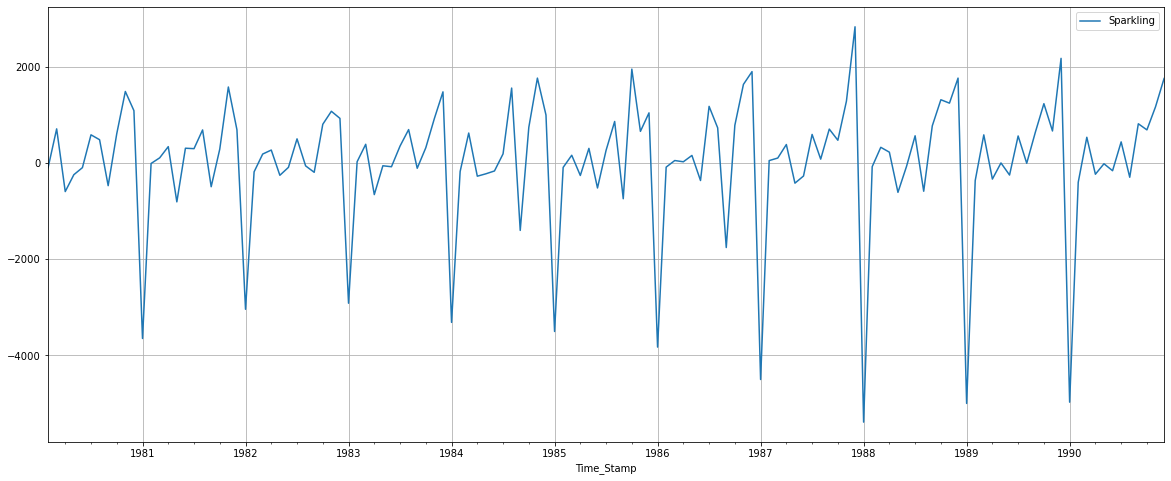

In [93]:
(df_train.diff(1).dropna()).plot(grid=True);

## 6. Build an Automated version of an ARIMA/SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### ARIMA Model

In [94]:
arima_test=df_test.copy()
arima_train=df_train.copy()

In [105]:
dftest = adfuller(arima_train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [95]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [96]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [97]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(arima_train,order=param, freq='M').fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922


C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 2) - AIC:2213.509212306332


In [98]:
### Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [99]:
model_arima = ARIMA(arima_train['Sparkling'], order=(2,1,2),freq='M')
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 06 Jun 2021   AIC                           2213.509
Time:                        22:09:12   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


The above model is an AutoRegressive Integrated Moving Average model of order (2,1,2) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 2 and a degree or order differencing of 1 to make it stationary.

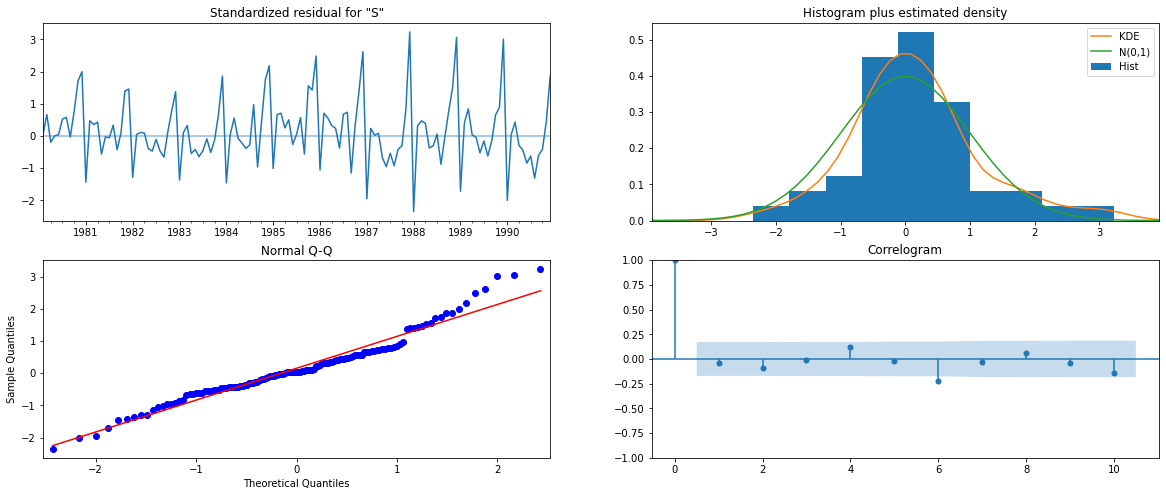

In [100]:
model_arima_fit.plot_diagnostics();

The diagnostics plot looks like that it tallies with the theoretical values. i.e.

histogram is normal
Blue dots are closer to best fit line

#### Predict the Train and Test Data

In [101]:
arima_train_predict = model_arima_fit.forecast(steps=len(arima_train))
arima_test_predict = model_arima_fit.forecast(steps=len(arima_test))

In [102]:
print('TRAIN ARIMA MAPE:',MAPE(arima_train['Sparkling'],arima_train_predict.values))
print('TRAIN ARIMA RMSE:',np.sqrt(mean_squared_error(arima_train['Sparkling'],arima_train_predict.values)))

print('\nTEST ARIMA MAPE:',MAPE(arima_test['Sparkling'],arima_test_predict.values))
print('TEST ARIMA RMSE:',np.sqrt(mean_squared_error(arima_test['Sparkling'],arima_test_predict.values)))



TRAIN ARIMA MAPE: 51.18510962141135
TRAIN ARIMA RMSE: 1333.4397372520937

TEST ARIMA MAPE: 47.099932436388684
TEST ARIMA RMSE: 1299.9795689481477


In [104]:
result_arima=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(arima_train['Sparkling'],arima_train_predict.values))],
                          'Train MAPE':[MAPE(arima_train['Sparkling'],arima_train_predict.values)],
                          'Test RMSE': [np.sqrt(mean_squared_error(arima_test['Sparkling'],arima_test_predict.values))],
                          'Test MAPE': [MAPE(arima_test['Sparkling'],arima_test_predict.values)]},index=['Auto ARIMA (2,1,2)'])


result_arima

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Auto ARIMA (2,1,2)",1333.439737,51.18511,1299.979569,47.099932


### SARIMA Model

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

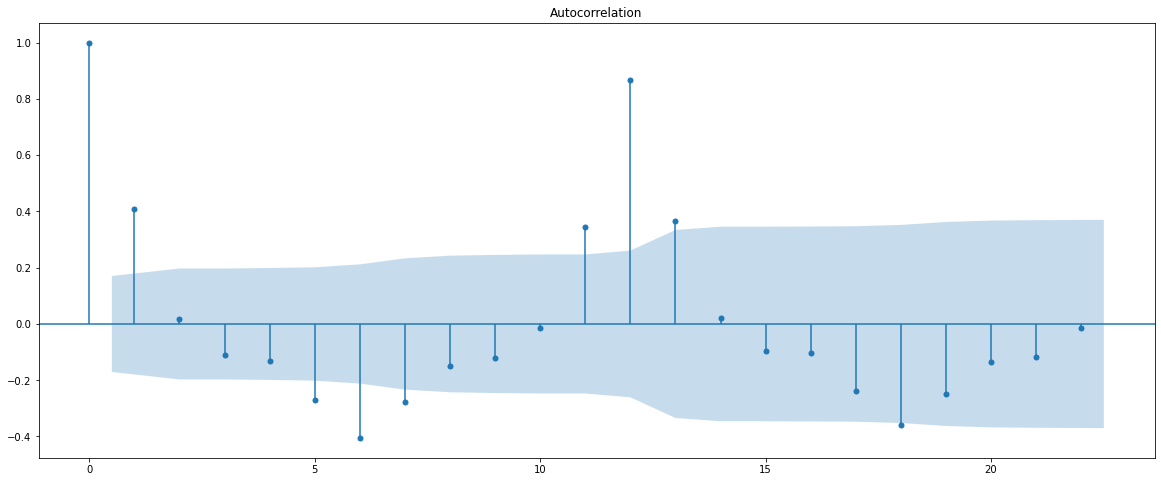

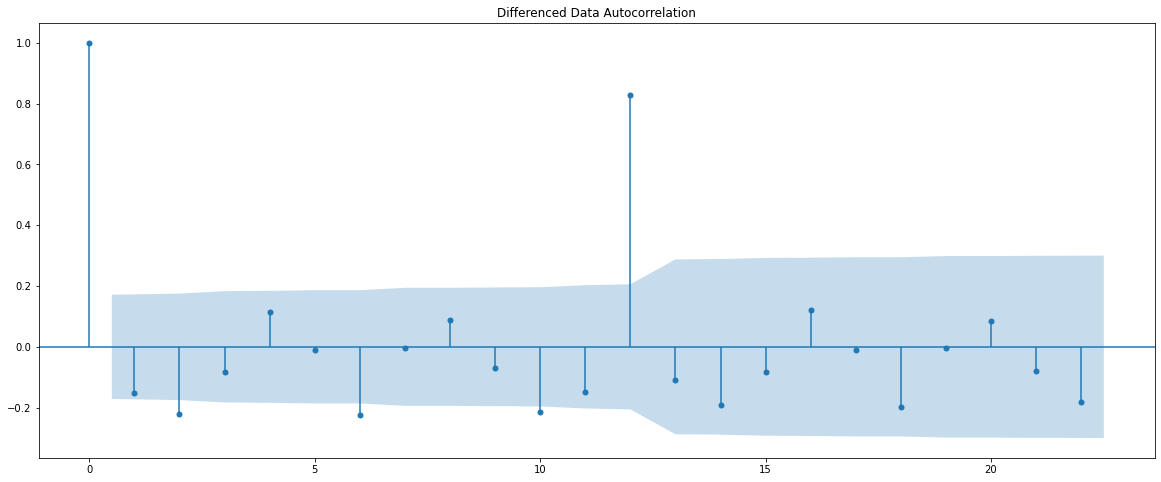

In [107]:
plot_acf(df_train)
plot_acf(df_train.diff(1).dropna(),title='Differenced Data Autocorrelation');

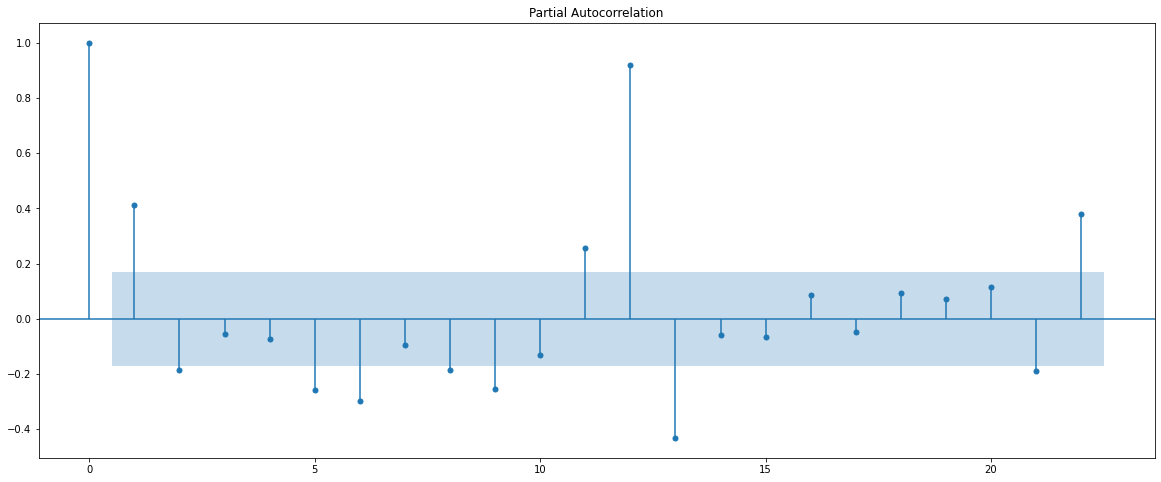

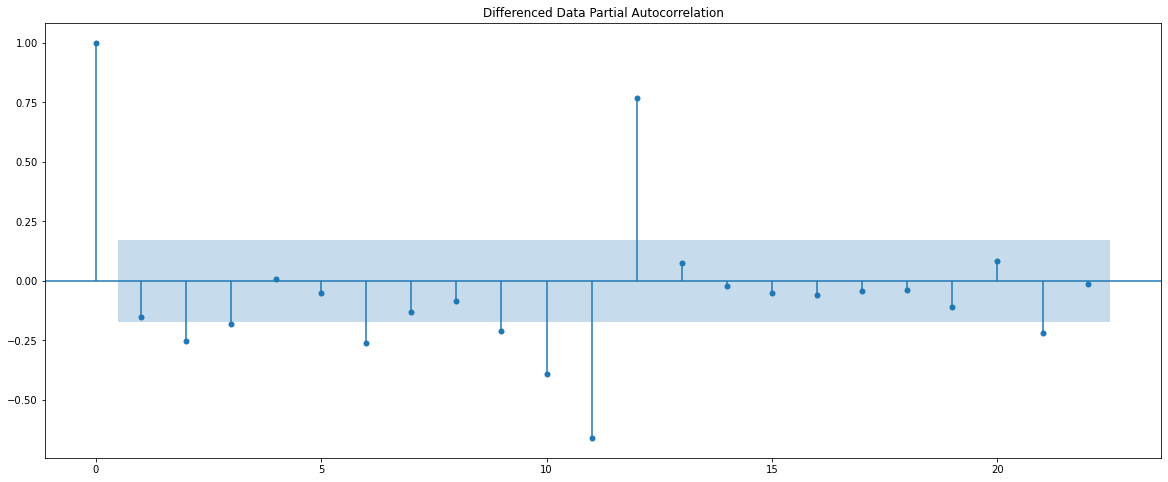

In [108]:
plot_pacf(df_train)
plot_pacf(df_train.diff(1).dropna(),title='Differenced Data Partial Autocorrelation');

- from ACF Model Seasonality value seems to be 12

In [109]:
sarima_train=df_train.copy()
sarima_test=df_test.copy()

In [110]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [112]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [113]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076790
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121579
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402
80,"(2, 1, 2)","(2, 0, 2, 12)",1557.840127
14,"(0, 1, 1)","(1, 0, 2, 12)",1570.150914
17,"(0, 1, 1)","(2, 0, 2, 12)",1570.401883
41,"(1, 1, 1)","(1, 0, 2, 12)",1571.324886
44,"(1, 1, 1)","(2, 0, 2, 12)",1571.806998


In [114]:
model_sarima = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_sarima_fit = model_sarima.fit(maxiter=1000)
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 06 Jun 2021   AIC                           1555.584
Time:                                    22:14:19   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

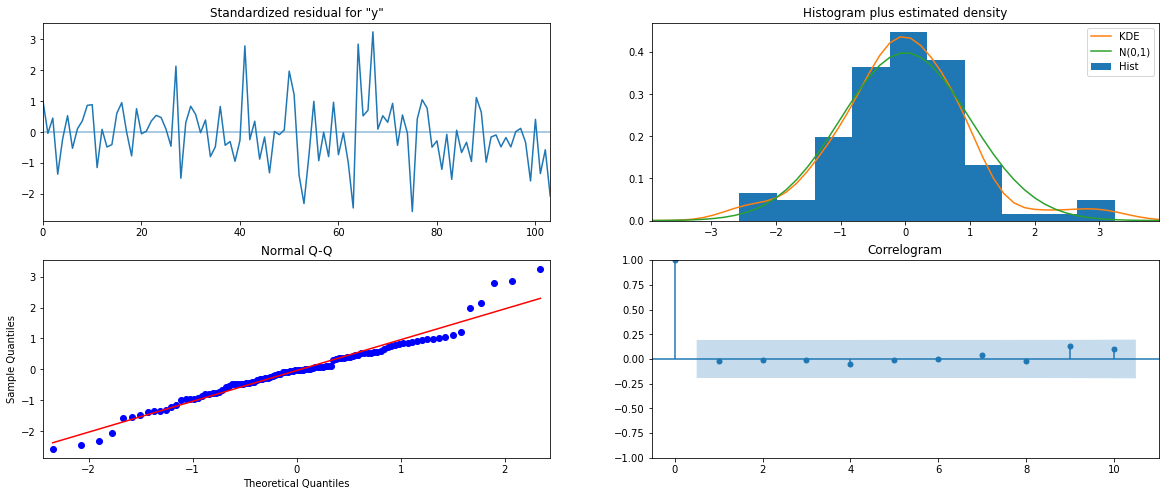

In [115]:
model_sarima_fit.plot_diagnostics();

In [116]:
sarima_train_predict = model_sarima_fit.forecast(steps=len(sarima_train))
sarima_test_predict = model_sarima_fit.forecast(steps=len(sarima_test))

In [117]:
print('TRAIN SARIMA MAPE:',MAPE(sarima_train['Sparkling'],sarima_train_predict))
print('TRAIN SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_train['Sparkling'],sarima_train_predict)))

print('\nTEST SARIMA MAPE:',MAPE(sarima_test['Sparkling'],sarima_test_predict))
print('TEST SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_test['Sparkling'],sarima_test_predict)))


TRAIN SARIMA MAPE: 32.00484949614682
TRAIN SARIMA RMSE: 883.1948497994097

TEST SARIMA MAPE: 20.955776685370456
TEST SARIMA RMSE: 528.6113639398799


In [118]:
result_sarima=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(sarima_train['Sparkling'],sarima_train_predict))],
                          'Train MAPE':[MAPE(sarima_train['Sparkling'],sarima_train_predict)],
                          'Test RMSE': [np.sqrt(mean_squared_error(sarima_test['Sparkling'],sarima_test_predict))],
                          'Test MAPE': [MAPE(sarima_test['Sparkling'],sarima_test_predict)]},index=['SARIMA (1, 1, 2)(1, 0, 2, 12)'])


result_sarima

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"SARIMA (1, 1, 2)(1, 0, 2, 12)",883.19485,32.004849,528.611364,20.955777


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

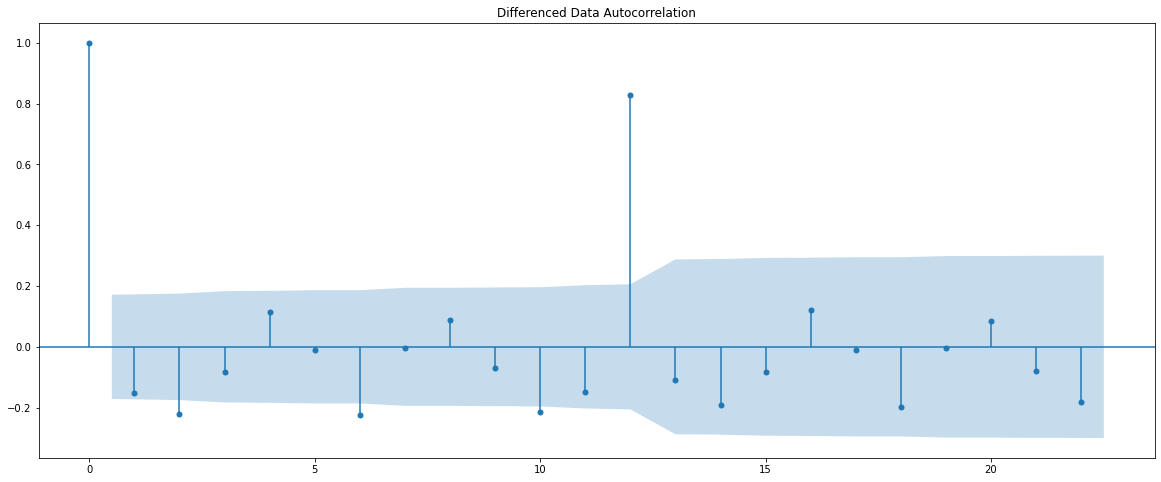

In [119]:
plot_acf(df_train.diff(1).dropna(),title='Differenced Data Autocorrelation');

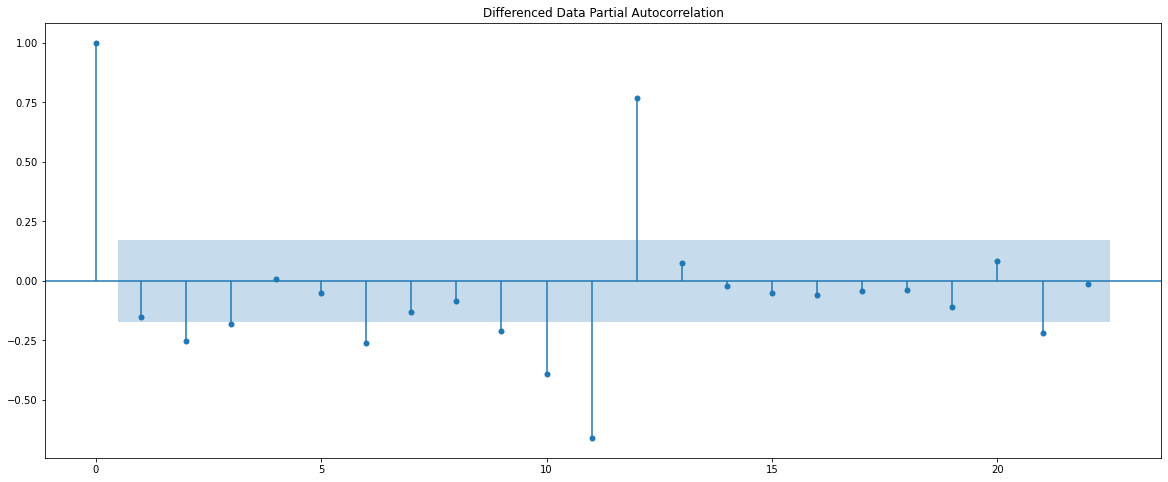

In [120]:
plot_pacf(df_train.diff(1).dropna(),title='Differenced Data Partial Autocorrelation');

Above taken alpha=0.05.

* The Auto-Regressive (AR) parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average (MA) parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p=2 and q=1

### ARIMA Model based on Cutoff ACF/PACF 

In [122]:
model_arima_1 = ARIMA(arima_train['Sparkling'], order=(2,1,1),freq='M')
model_arima_1_fit = model_arima_1.fit()
print(model_arima_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Sun, 06 Jun 2021   AIC                           2233.778
Time:                        22:22:30   BIC                           2245.278
Sample:                    01-31-1980   HQIC                          2238.451
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


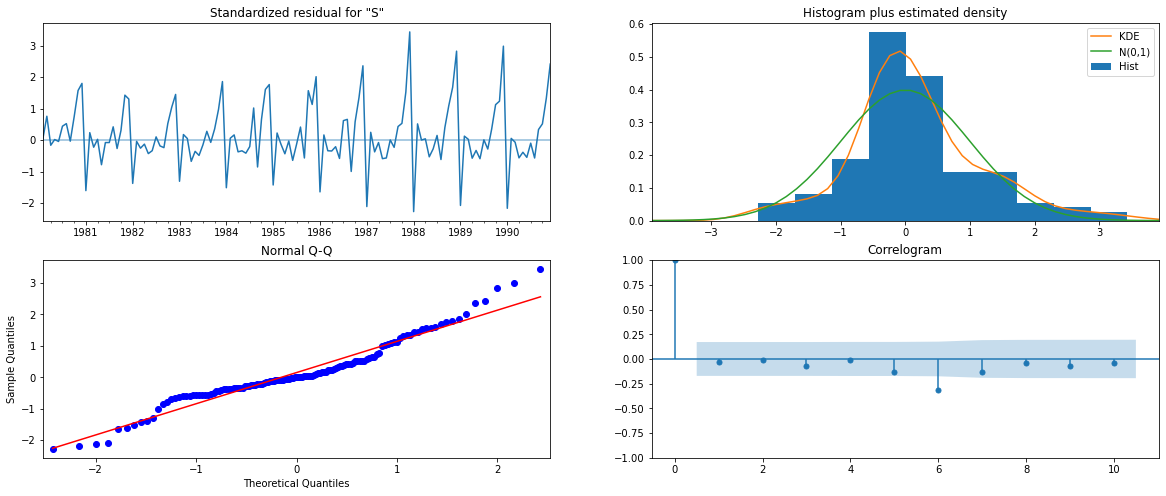

In [127]:
model_arima_1_fit.plot_diagnostics();

#### diagnostic plot Inference
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken and is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Thus It appears that our ARIMA model is working fine.

In [128]:
arima_train_predict1 = model_arima_1_fit.forecast(steps=len(arima_train))
arima_test_predict1 = model_arima_1_fit.forecast(steps=len(arima_test))

In [129]:
print('TRAIN ARIMA MAPE:',MAPE(arima_train['Sparkling'],arima_train_predict1.values))
print('TRAIN ARIMA RMSE:',np.sqrt(mean_squared_error(arima_train['Sparkling'],arima_train_predict1.values)))

print('\nTEST ARIMA MAPE:',MAPE(arima_test['Sparkling'],arima_test_predict1.values))
print('TEST ARIMA RMSE:',np.sqrt(mean_squared_error(arima_test['Sparkling'],arima_test_predict1.values)))


TRAIN ARIMA MAPE: 41.58991886673875
TRAIN ARIMA RMSE: 1312.2389913776417

TEST ARIMA MAPE: 40.22566886874919
TEST ARIMA RMSE: 1300.7213791070633


In [131]:
result_arima_1=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(arima_train['Sparkling'],arima_train_predict1.values))],
                          'Train MAPE':[MAPE(arima_train['Sparkling'],arima_train_predict1.values)],
                          'Test RMSE': [np.sqrt(mean_squared_error(arima_test['Sparkling'],arima_test_predict1.values))],
                          'Test MAPE': [MAPE(arima_test['Sparkling'],arima_test_predict1.values)]},
                            index=['ARIMA on ACF/PACF Cutoff(2,1,1)'])


result_arima_1

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"ARIMA on ACF/PACF Cutoff(2,1,1)",1312.238991,41.589919,1300.721379,40.225669


### SARIMA Model based on Cutoff ACF/PACF

In [133]:
model_sarima_1 = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                order=(2,1,1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_sarima_fit_1 = model_sarima_1.fit(maxiter=1000)

print(model_sarima_fit_1.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -875.281
Date:                             Sun, 06 Jun 2021   AIC                           1758.562
Time:                                     22:29:23   BIC                           1769.610
Sample:                                          0   HQIC                          1763.047
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2466      0.079      3.132      0.002       0.092       0.401
ar.L2         -0.0828      

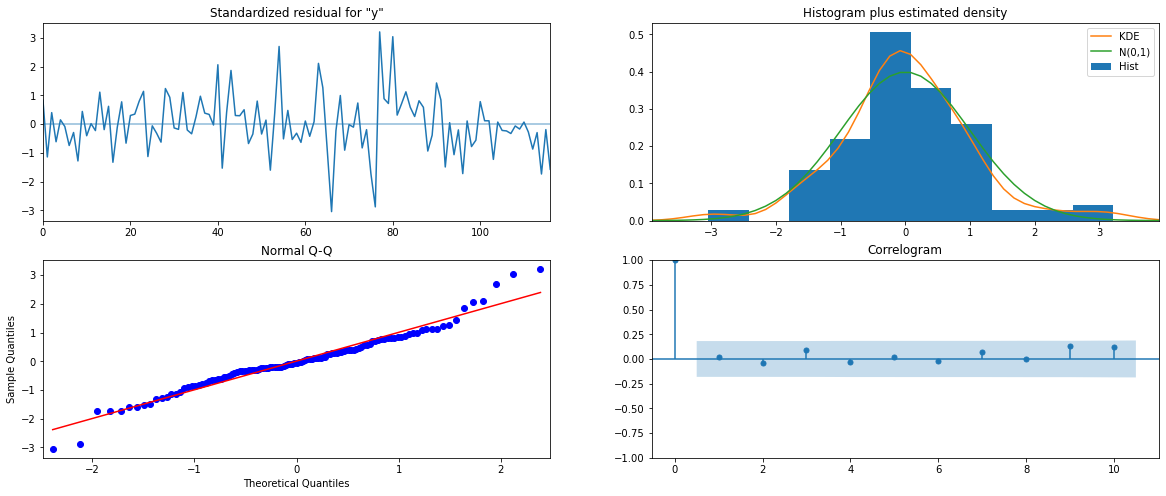

In [134]:
model_sarima_fit_1.plot_diagnostics();

In [135]:
sarima_train_predict1 = model_sarima_fit_1.forecast(steps=len(sarima_train))
sarima_test_predict1 = model_sarima_fit_1.forecast(steps=len(sarima_test))

In [136]:
print('TRAIN SARIMA MAPE:',MAPE(sarima_train['Sparkling'],sarima_train_predict1))
print('TRAIN SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_train['Sparkling'],sarima_train_predict1)))

print('\nTEST SARIMA MAPE:',MAPE(sarima_test['Sparkling'],sarima_test_predict1))
print('TEST SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_test['Sparkling'],sarima_test_predict1)))


TRAIN SARIMA MAPE: 13.974201055298147
TRAIN SARIMA RMSE: 480.0382542516234

TEST SARIMA MAPE: 11.137583230067339
TEST SARIMA RMSE: 322.0784618181228


In [137]:
result_sarima_1=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(sarima_train['Sparkling'].values,sarima_train_predict1))],
                          'Train MAPE':[MAPE(sarima_train['Sparkling'].values,sarima_train_predict1)],
                          'Test RMSE': [np.sqrt(mean_squared_error(sarima_test['Sparkling'].values,sarima_test_predict1))],
                          'Test MAPE': [MAPE(sarima_test['Sparkling'].values,sarima_test_predict1)]},
                             index=['SARIMA on ACF/PACF Cutoff (2, 1, 1)(0, 1, 0, 12)'])


result_sarima_1

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"SARIMA on ACF/PACF Cutoff (2, 1, 1)(0, 1, 0, 12)",480.038254,13.974201,322.078462,11.137583


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [138]:
results_Df = pd.DataFrame(columns=['Train RMSE','Train MAPE','Test RMSE','Test MAPE'])

In [139]:
results_Df

,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [140]:
results_Df=pd.concat([results_Df,result_MA,result_ses,result_des,result_tes,
                     result_lr,result_nb,result_sa,result_arima,
                      result_sarima,result_arima_1,result_sarima_1])
results_Df

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
TrailingMovingAvg_2,NaN,NaN,813.400684,24.711354
TrailingMovingAvg_4,NaN,NaN,1156.589694,41.083652
TrailingMovingAvg_6,NaN,NaN,1283.927428,48.400376
TrailingMovingAvg_9,NaN,NaN,1346.278315,50.071571
"Alpha=0.0496,SES",1315.232077,38.640010,1316.035487,50.940345
"Alpha=0.688,Beta=0.00009,DES",1349.650460,40.595528,2007.238526,76.086198
"Alpha=0.111,Beta=0.0617,Gamma= 0.395,TES",356.974929,11.318272,469.767970,17.580255
Linear Regression,1279.322346,40.703902,1389.135175,59.345572
Naive,NaN,NaN,3864.279352,201.327650
Simple Avg,NaN,NaN,1275.081804,39.157336


In [141]:
# sorting the results based on lowest RMSE

print('Sorted by RMSE values on the Test Data:')
display(results_Df.sort_values(by=['Test RMSE']))


Sorted by RMSE values on the Test Data:


,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"SARIMA on ACF/PACF Cutoff (2, 1, 1)(0, 1, 0, 12)",480.038254,13.974201,322.078462,11.137583
"Alpha=0.111,Beta=0.0617,Gamma= 0.395,TES",356.974929,11.318272,469.767970,17.580255
"SARIMA (1, 1, 2)(1, 0, 2, 12)",883.194850,32.004849,528.611364,20.955777
TrailingMovingAvg_2,NaN,NaN,813.400684,24.711354
TrailingMovingAvg_4,NaN,NaN,1156.589694,41.083652
Simple Avg,NaN,NaN,1275.081804,39.157336
TrailingMovingAvg_6,NaN,NaN,1283.927428,48.400376
"Auto ARIMA (2,1,2)",1333.439737,51.185110,1299.979569,47.099932
"ARIMA on ACF/PACF Cutoff(2,1,1)",1312.238991,41.589919,1300.721379,40.225669
"Alpha=0.0496,SES",1315.232077,38.640010,1316.035487,50.940345


SARIMA Model on ACF/PACF Cutoff order (2,1,1) Seasonality (0,1,0,12) is the best model to forecast as its RMSE and MAPE values are smaller than the other model which means that the error in prediction is much smaller

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [143]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'].values,
                                order=(2,1,1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  187
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1285.002
Date:                             Sun, 06 Jun 2021   AIC                           2578.004
Time:                                     22:36:01   BIC                           2590.594
Sample:                                          0   HQIC                          2583.112
                                             - 187                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1108      0.057      1.944      0.052      -0.001       0.222
ar.L2         -0.0819      

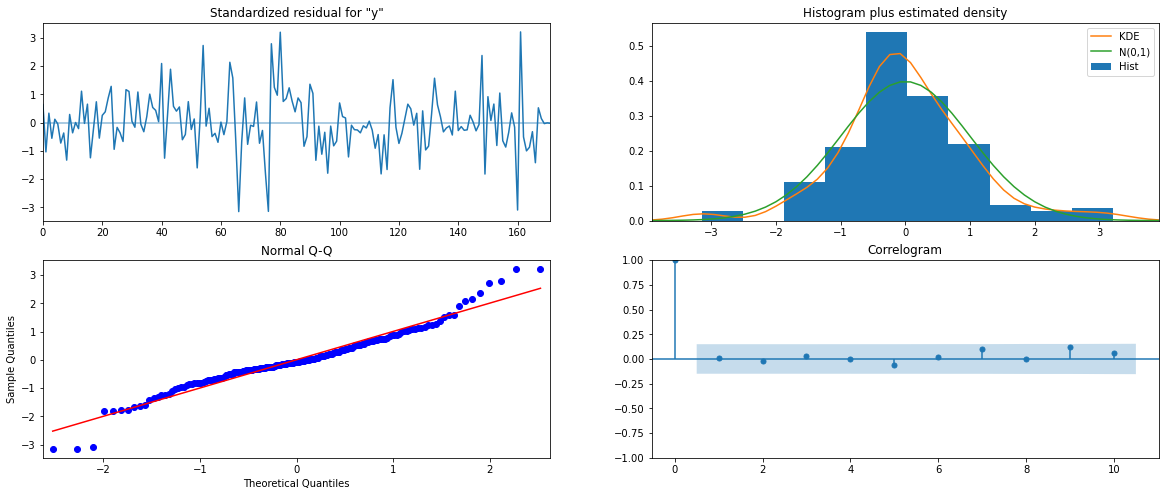

In [144]:
results_full_data_model.plot_diagnostics();

In [145]:
SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [146]:
SARIMA_full_data_forecast = results_full_data_model.forecast(steps=12)

In [147]:
SARIMA_full_data_forecast

array([1505.27123641, 2978.9996512 , 3395.23954066, 3739.09571835,
       6009.14200963, 1080.15891033, 1412.156993  , 1907.15539715,
       1872.15537733, 1680.15550577, 1698.15552162, 2041.15551286])

In [148]:
SARIMA_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1505.271236,421.128697,679.874157,2330.668316
1,2978.999651,423.967467,2148.038685,3809.960617
2,3395.239541,424.795940,2562.654798,4227.824283
3,3739.095718,424.813279,2906.476992,4571.714444
4,6009.142010,424.825675,5176.498987,6841.785032


In [149]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 576.2039680291186


In [150]:
pred_full_SARIMA_date = SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [151]:
pred_full_SARIMA_date

y,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1505.271236,421.128697,679.874157,2330.668316
1995-09-30,2978.999651,423.967467,2148.038685,3809.960617
1995-10-31,3395.239541,424.795940,2562.654798,4227.824283
1995-11-30,3739.095718,424.813279,2906.476992,4571.714444
1995-12-31,6009.142010,424.825675,5176.498987,6841.785032
1996-01-31,1080.158910,424.830733,247.505974,1912.811847
1996-02-29,1412.156993,424.830455,579.504601,2244.809385
1996-03-31,1907.155397,424.830070,1074.503760,2739.807034
1996-04-30,1872.155377,424.830050,1039.503780,2704.806974
1996-05-31,1680.155506,424.830080,847.503850,2512.807161


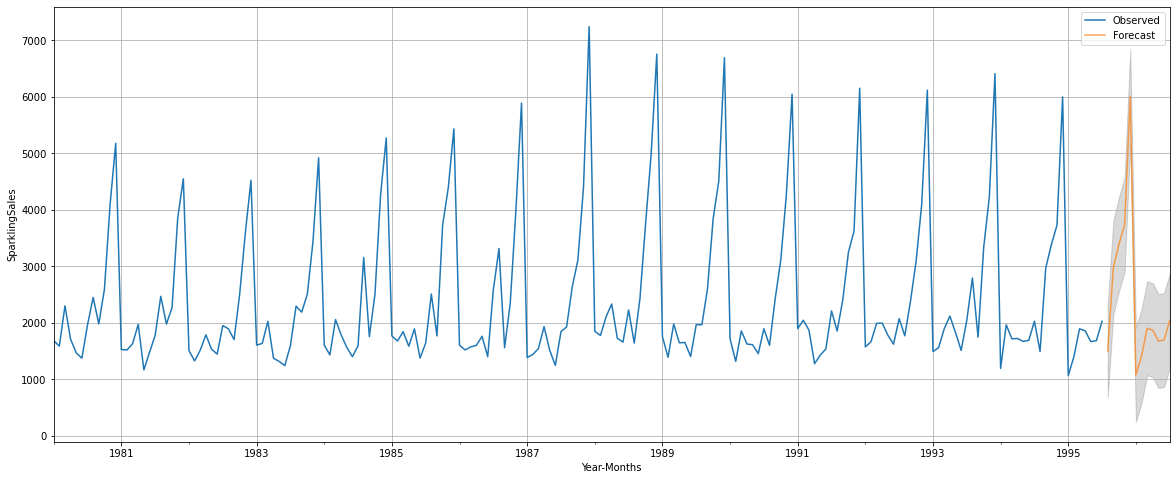

In [152]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SparklingSales')
plt.legend(loc='best')
plt.grid();